In [6]:
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, roc_curve, balanced_accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as st

In [7]:
df=pd.read_csv("neo.csv")

In [8]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


### Powtarzalność asteroid po numerze ID

In [9]:
q = df['id'].value_counts()
w =q[q>1]
w

2469219     43
2277810     43
3743123     40
2138175     39
3893865     38
            ..
3844017      2
54054566     2
54244193     2
3716436      2
54192757     2
Name: id, Length: 15902, dtype: int64

# podgląd cech

#### usuwanie niepotrzebnych kolumn

In [10]:
df.drop(["orbiting_body","sentry_object", 'est_diameter_max'],axis=1,inplace=True)
df.head()

,id,name,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,42737.733765,4.627557e+07,20.09,True


## rysowanie rozkładu

/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4191/1240462077.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4191/1240462077.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/j7/gf67sfkx7vd_

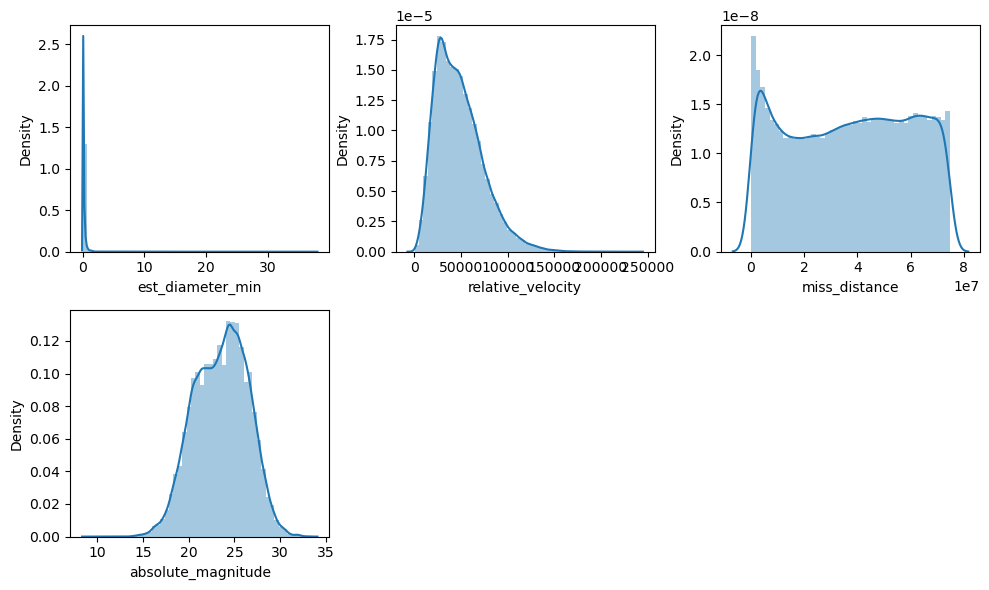

In [18]:
nums = ["est_diameter_min","relative_velocity","miss_distance","absolute_magnitude"]
rows=2
cols=3
counter=1
plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

# Rozkład klas 

In [19]:
df["hazardous"].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

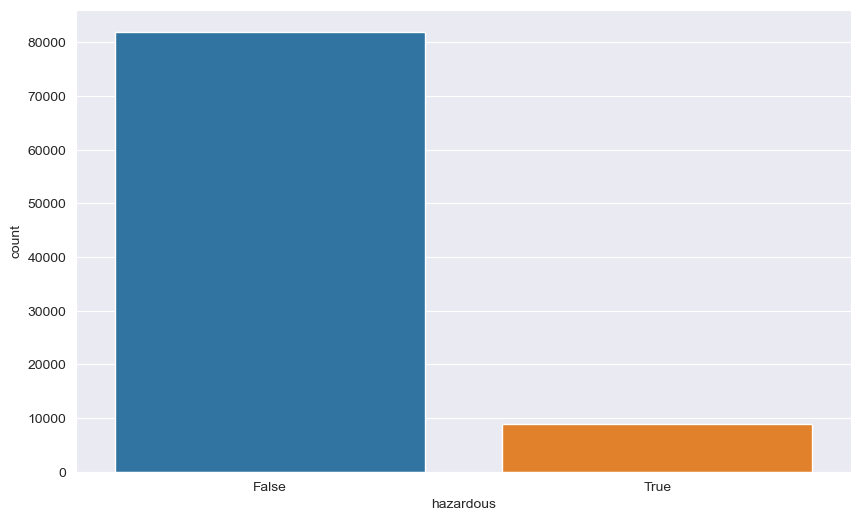

In [20]:
sns.set_style("darkgrid")
sns.countplot(x='hazardous',data=df)


plt.show()

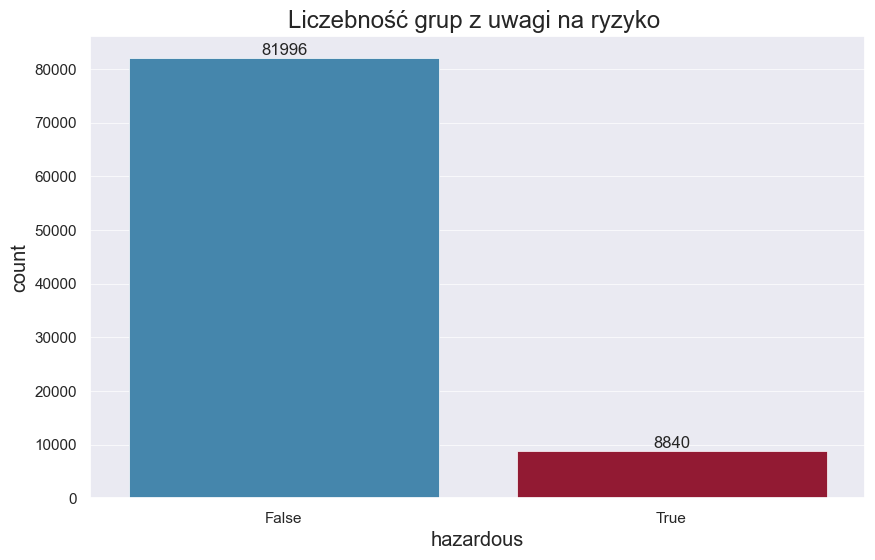

In [68]:
values = df["hazardous"].value_counts()
sns.set_style("darkgrid")
ax = sns.countplot(x='hazardous',data=df)
ax.bar_label(container=ax.containers[0], labels=values, rotation=0)
plt.title('Liczebność grup z uwagi na ryzyko ')
plt.show()

In [21]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [22]:
y =df['hazardous']
y

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [23]:
corr_matrix=df.corr()
corr_matrix

/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4191/363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,id,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.059176,-0.056510,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,0.277258,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.191185,0.042302,-0.365267,1.000000


In [24]:
corr_hazardous = corr_matrix['hazardous']
np.abs(corr_hazardous).sort_values(ascending = False)

hazardous             1.000000
absolute_magnitude    0.365267
relative_velocity     0.191185
est_diameter_min      0.183363
id                    0.123443
miss_distance         0.042302
Name: hazardous, dtype: float64

### Wykres korelacji

/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4191/1127099383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu', annot=True)


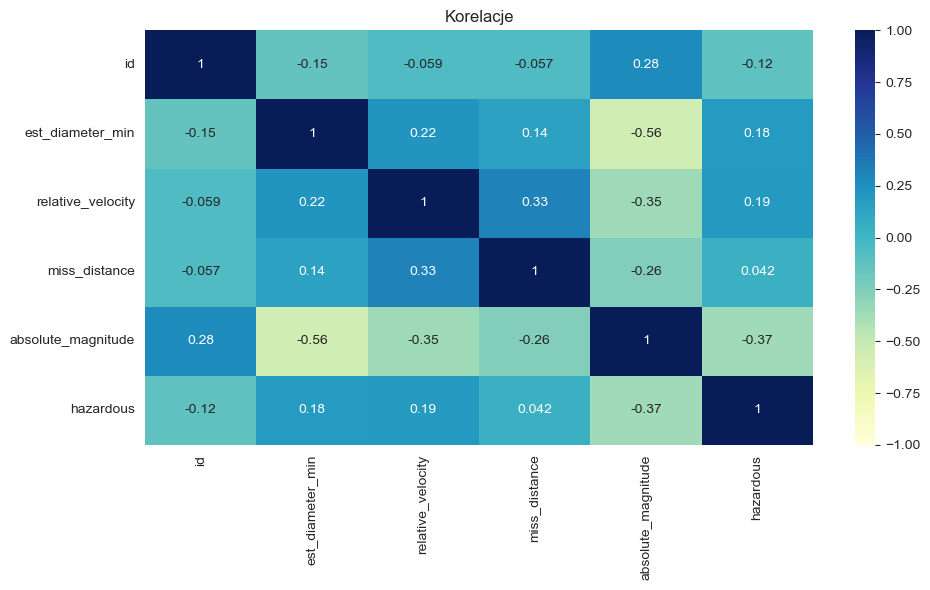

In [25]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu', annot=True)
plt.title('Korelacje')
plt.tight_layout()
plt.show()

In [73]:
features = ['est_diameter_min',
       'relative_velocity', 'miss_distance',
       'absolute_magnitude']

X = df[features]
X

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
0,0.180880,13569.249224,5.483974e+07,16.73
1,-1.325011,73588.726663,6.143813e+07,20.00
2,-0.325689,114258.692129,4.979872e+07,17.83
3,-2.338149,24764.303138,2.543497e+07,22.20
4,-1.366458,42737.733765,4.627557e+07,20.09
...,...,...,...,...
90831,-3.627596,52078.886692,1.230039e+07,25.00
90832,-4.088113,46114.605073,5.432121e+07,26.00
90833,-3.443389,7566.807732,2.840077e+07,24.60
90834,-4.917044,69199.154484,6.869206e+07,27.80


### ENCODING

In [74]:
label=LabelEncoder()
y=label.fit_transform(y)

### Dzielimy zbiór

In [75]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

#### Nie dokonujemy standaryzacji dla drzew decyzyjnych 
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(train_X))
X_test_scaled=pd.DataFrame(sc.transform(test_X))

### Tworzymy drzewo z przykładowymi parametrami 

In [76]:
dt= DecisionTreeClassifier(max_depth=7, random_state=123,criterion = 'entropy' )
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

### Pętla do AUC z confusionmatrix

In [22]:
depth = range(2,100,1)

for i in depth:
    dt= DecisionTreeClassifier(max_depth=i, random_state=123,criterion = 'entropy' )
    dt.fit(train_X, train_y)
    pred_train = dt.predict(train_X)
    pred_test = dt.predict(test_X)
    ###print(f'"depth": {i}', classification_report(train_y,pred_train))
    print(f'"depth": {i}', classification_report(test_y,pred_test)) 
    

"depth": 2               precision    recall  f1-score   support

           0       0.91      1.00      0.95     20499
           1       0.80      0.13      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.86      0.56      0.59     22709
weighted avg       0.90      0.91      0.88     22709

"depth": 3               precision    recall  f1-score   support

           0       0.91      1.00      0.95     20499
           1       0.83      0.13      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.87      0.56      0.59     22709
weighted avg       0.91      0.91      0.88     22709

"depth": 4               precision    recall  f1-score   support

           0       0.91      1.00      0.95     20499
           1       0.83      0.13      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.87      0.56      0.59     22709
weighted avg       0.91      0.91      0.

#### Pętla z auc

In [141]:
depth = range(2,150,1)

for i in depth:
    dt= DecisionTreeClassifier(max_depth=i, random_state=123,criterion = 'entropy' )
    dt.fit(train_X, train_y)
    pred_train = dt.predict(train_X)
    pred_test = dt.predict(test_X)
    y_pred_proba = dt.predict_proba(test_X)[:,1]
    y_pred_proba 
    auc2 = roc_auc_score(test_y, y_pred_proba)
    ###print(f'"depth": {i}', classification_report(train_y,pred_train))
    print(f'"depth": {i}, "auc": {auc2}')

"depth": 2, "auc": 0.8825539001019584
"depth": 4, "auc": 0.8931021135784352
"depth": 6, "auc": 0.9090187271026796
"depth": 8, "auc": 0.9094332269601939
"depth": 10, "auc": 0.9061134093507267
"depth": 12, "auc": 0.8976244067970206
"depth": 14, "auc": 0.8913084602515651
"depth": 16, "auc": 0.8824467323094228
"depth": 18, "auc": 0.8717472477964381
"depth": 20, "auc": 0.8587553548026513
"depth": 22, "auc": 0.8375672557915307
"depth": 24, "auc": 0.826522847709821
"depth": 26, "auc": 0.803415253232748
"depth": 28, "auc": 0.7850101836995028
"depth": 30, "auc": 0.772280912500091
"depth": 32, "auc": 0.7543651616158741
"depth": 34, "auc": 0.7380207488324672
"depth": 36, "auc": 0.7316580833101007
"depth": 38, "auc": 0.7248327641630902
"depth": 40, "auc": 0.7185925524675192
"depth": 42, "auc": 0.7140946948300535
"depth": 44, "auc": 0.7116063381526833
"depth": 46, "auc": 0.7063774217879296
"depth": 48, "auc": 0.7038439795871292
"depth": 50, "auc": 0.7045086075272627
"depth": 52, "auc": 0.7021712128

# Tworzenie modelu

In [77]:
dt= DecisionTreeClassifier(max_depth=7, random_state=123,criterion = 'entropy' )
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

In [78]:
pred_train = dt.predict(train_X)
pred_train
pred_test = dt.predict(test_X)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print(classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61497
           1       0.87      0.13      0.22      6630

    accuracy                           0.91     68127
   macro avg       0.89      0.56      0.59     68127
weighted avg       0.91      0.91      0.88     68127



In [81]:
print(classification_report(test_y,pred_test))
print('Accuracy Score: ', accuracy_score(test_y,pred_test))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y,pred_test))
print('Confusion Matrix: \n', confusion_matrix(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20499
           1       0.84      0.12      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.88      0.56      0.58     22709
weighted avg       0.91      0.91      0.88     22709

Accuracy Score:  0.9123695451142719
Balanced_accuracy Score:  0.5604719598947439
Confusion Matrix: 
 [[20446    53]
 [ 1937   273]]


### Wykres confusion_matrix

Text(0.5, 1.0, 'Macierz pomyłek')

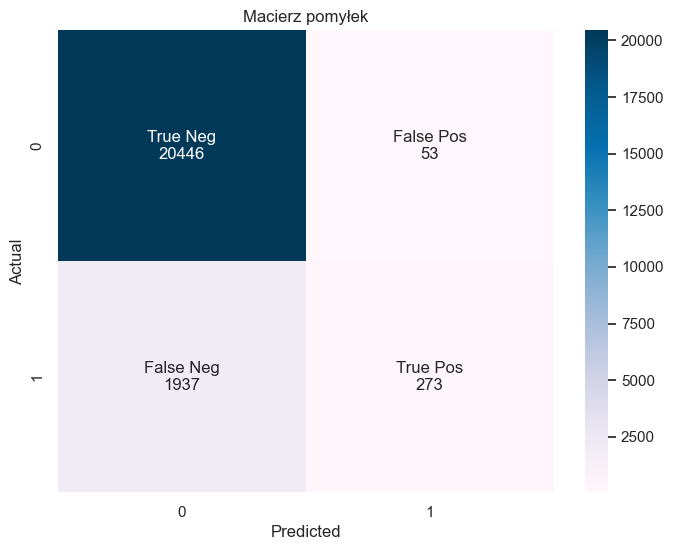

In [82]:
cf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] #flatten() 'splaszcza' matryce

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuBu')
ax.set(xlabel='Predicted', ylabel='Actual');
plt.title ("Macierz pomyłek")

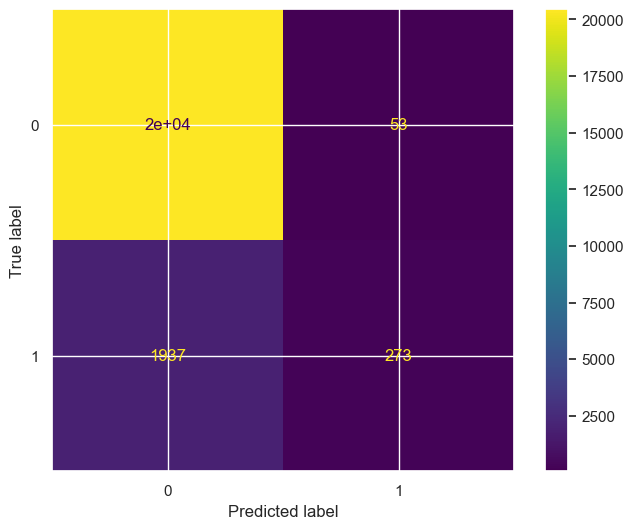

In [83]:
cm = confusion_matrix(test_y, pred_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()

plt.show()

### Istotność cech

<Axes: title={'center': 'Istotność cech dla drzewa decyyzjnego'}>

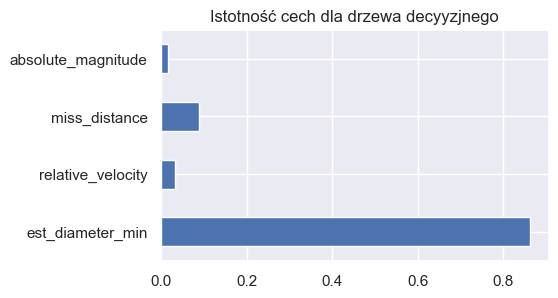

In [84]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh', title='Istotność cech dla drzewa decyyzjnego',figsize=[5,3])

In [86]:
train_pred_proba = dt.predict_proba(train_X)[:,1]
train_pred_proba
auc = roc_auc_score(train_y, train_pred_proba )
print (auc)
fpr, tpr,_ = roc_curve(train_y, train_pred_proba)

0.9118901114527873


In [87]:
test_pred_proba= dt.predict_proba(test_X)[:,1]
test_pred_proba

array([0.        , 0.10561056, 0.        , ..., 0.        , 0.        ,
       0.39018405])

In [88]:
auc2 = roc_auc_score(test_y, test_pred_proba)
print (auc2)

0.9106376119439885


In [89]:
a = round ((auc),3)
b = round ((auc2),3)

In [90]:
fpr2, tpr2,_ = roc_curve(test_y, test_pred_proba)

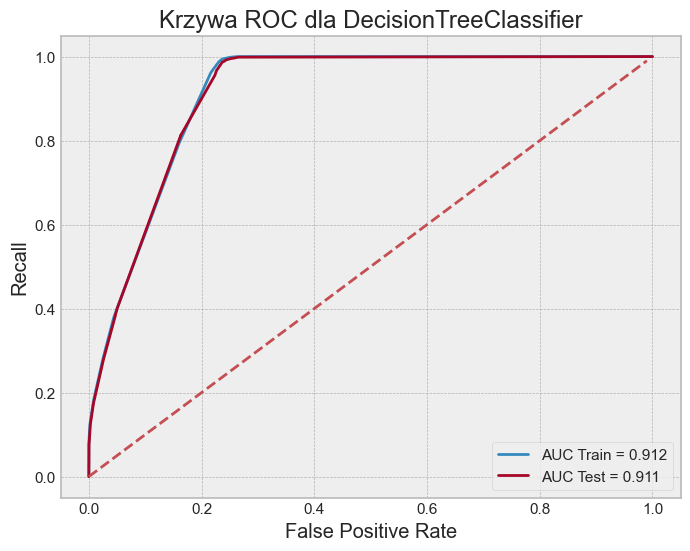

In [91]:
plt.style.use('bmh')
plt.plot(fpr, tpr, label="AUC Train = " + str(a))
plt.plot(fpr2, tpr2, label="AUC Test = " + str(b))
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'r--')
plt.title('Krzywa ROC dla DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Wydruk Drzewa

In [33]:
plt.figure(figsize = (15,8))
plot_tree(dt,feature_names = features)

[Text(0.10423797840948326, 0.9782608695652174, 'est_diameter_min <= 0.099\nentropy = 0.46\nsamples = 68127\nvalue = [61497, 6630]'),
 Text(0.0019180435955325568, 0.9347826086956522, 'est_diameter_min <= 0.088\nentropy = 0.003\nsamples = 45515\nvalue = [45505, 10]'),
 Text(0.0012786957303550378, 0.8913043478260869, 'entropy = 0.0\nsamples = 43420\nvalue = [43420, 0]'),
 Text(0.0025573914607100756, 0.8913043478260869, 'relative_velocity <= 33840.547\nentropy = 0.044\nsamples = 2095\nvalue = [2085, 10]'),
 Text(0.0019180435955325568, 0.8478260869565217, 'entropy = 0.0\nsamples = 525\nvalue = [525, 0]'),
 Text(0.0031967393258875948, 0.8478260869565217, 'relative_velocity <= 33849.006\nentropy = 0.056\nsamples = 1570\nvalue = [1560, 10]'),
 Text(0.0025573914607100756, 0.8043478260869565, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0038360871910651136, 0.8043478260869565, 'relative_velocity <= 43881.289\nentropy = 0.051\nsamples = 1569\nvalue = [1560, 9]'),
 Text(0.003196739325887

Error in callback <function flush_figures at 0x7fce118994c0> (for post_execute):


KeyboardInterrupt: 

In [92]:
auc

0.9118901114527873

### Próba z crosvalidation

In [93]:
clf = DecisionTreeClassifier(random_state=123)

sk_folds = StratifiedKFold(n_splits = 5)


scores = cross_val_score(clf, X, y, cv = sk_folds, scoring = 'f1')


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [0.39569452 0.44043513 0.43498818 0.45144658 0.46311352]
Average CV Score:  0.4371355841839072
Number of CV Scores used in Average:  5


In [94]:
clf = DecisionTreeClassifier(random_state=123)

sk_folds = StratifiedKFold(n_splits = 5)

scoring = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']

for i in scoring:
    scores = cross_val_score(clf, X, y, cv = sk_folds, scoring = i)
    print (f' {i}: \n {scores}')
    print(f'"Average {i}: "', round (scores.mean(),3))



 f1: 
 [0.39569452 0.44043513 0.43498818 0.45144658 0.46311352]
"Average f1: " 0.437
 accuracy: 
 [0.87021136 0.88391039 0.89475422 0.89458909 0.90185501]
"Average accuracy: " 0.889
 recall: 
 [0.43665158 0.46945701 0.41628959 0.44570136 0.43495475]
"Average recall: " 0.441
 precision: 
 [0.36176195 0.4147926  0.45544554 0.45734185 0.49517064]
"Average precision: " 0.437
 roc_auc: 
 [0.6768014  0.69902511 0.68131389 0.69434284 0.69357348]
"Average roc_auc: " 0.689


### OVERSAMPLING ze SMOTE

In [95]:
from imblearn.over_sampling import SMOTE


In [96]:
smote = SMOTE (random_state=123)
 
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y)

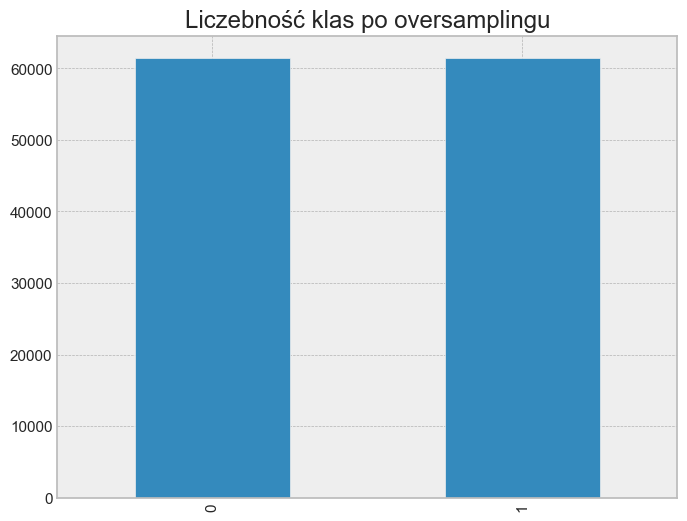

In [97]:
a = pd.Series(train_y_smote).value_counts().plot.bar()
sns.set_style("darkgrid")
plt.title ("Liczebność klas po oversamplingu")
plt.show()


### GRIDSEARCH

In [43]:
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5)
param_grid= [                           
              {
                'max_depth': range(1, 60, 1),
                'min_samples_leaf' : range(3, 50),
                'criterion' : ["gini", "entropy"]
                }
              ]

print(param_grid)

model_smote = DecisionTreeClassifier(random_state = 123)
  
grid_smote = GridSearchCV(estimator=model_smote
                                 , param_grid=param_grid, scoring="recall", cv=skf)
 
grid_smote.fit(X=test_X, y=test_y)
 
best_parameters_smote = grid_smote.best_params_  
print(best_parameters_smote) 



[{'max_depth': range(1, 60), 'min_samples_leaf': range(3, 50), 'criterion': ['gini', 'entropy']}]
{'criterion': 'entropy', 'max_depth': 41, 'min_samples_leaf': 3}


## Pętla do AUC z wykresem - w zaleźności od max_depth

"depth": 2 
 auc:0.8781914425138054
"depth": 3 
 auc:0.8958673626944388
"depth": 4 
 auc:0.9016478455300434
"depth": 5 
 auc:0.8983118810121848
"depth": 6 
 auc:0.8993998713986489
"depth": 7 
 auc:0.900957755581941
"depth": 8 
 auc:0.9010469112388001
"depth": 9 
 auc:0.9014159061726663
"depth": 10 
 auc:0.9018944638950492
"depth": 11 
 auc:0.8982658352829926
"depth": 12 
 auc:0.8980812991870921
"depth": 13 
 auc:0.8972736226620921
"depth": 14 
 auc:0.896060463384264
"depth": 15 
 auc:0.8918191352011653
"depth": 16 
 auc:0.8890617112102809
"depth": 17 
 auc:0.8839704795223429
"depth": 18 
 auc:0.878255456231283
"depth": 19 
 auc:0.8713668076513611
"depth": 20 
 auc:0.8671924620978089
"depth": 21 
 auc:0.8592659856048602
"depth": 22 
 auc:0.8512571080059308
"depth": 23 
 auc:0.8429969324185111
"depth": 24 
 auc:0.8349632770961788
"depth": 25 
 auc:0.8314066308057406
"depth": 26 
 auc:0.8307759632464137
"depth": 27 
 auc:0.8236328049552797
"depth": 28 
 auc:0.8204383107530463
"depth": 29 

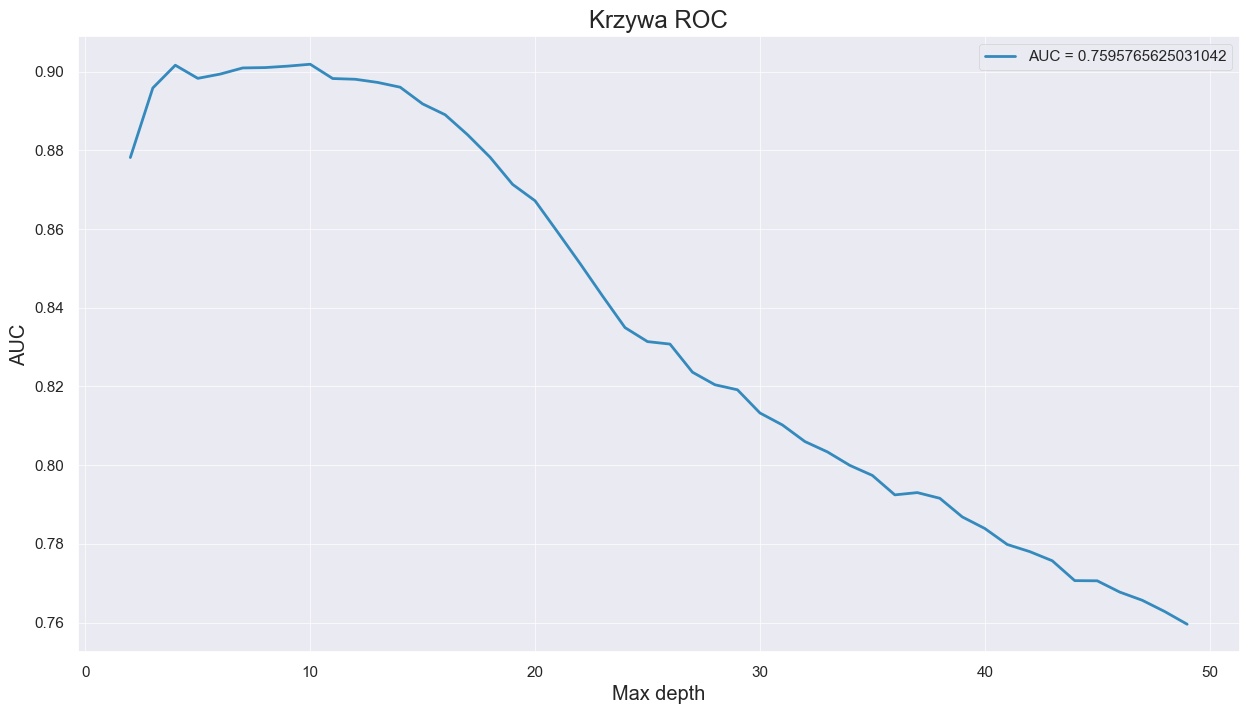

In [39]:
plt.figure(figsize=(15, 8))
depth = range(2,50,1)
auc_scores = [] 
skf = StratifiedKFold(n_splits=5)

for i in depth:
    model= DecisionTreeClassifier(max_depth=i, random_state=123, criterion = 'gini')
    model.fit(train_X_smote, train_y_smote)
    pred_train_smote = model.predict(train_X_smote)
    pred_test_smote = model.predict(test_X)
    y_pred_proba_smote = model.predict_proba(test_X)[:,1]
    fprx, tprx,_ = roc_curve(test_y,  y_pred_proba_smote)
    aucx = roc_auc_score(test_y,  y_pred_proba_smote)
    auc_scores.append(aucx)
    print(f'"depth": {i} \n auc:{aucx}' ) 
plt.plot(depth, auc_scores ,label="AUC = " + str(aucx))
plt.title('Krzywa ROC')
plt.xlabel('Max depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

Trenowanie modelu - dla najlepszych parametrów z GRIDSEARCH

In [99]:
model_smote2 = DecisionTreeClassifier(**best_parameters_smote)
model_smote2.fit(train_X_smote, train_y_smote)

NameError: name 'best_parameters_smote' is not defined

Trenowanie modelu - manualny wybór parametrów

In [100]:
model_smote2 = DecisionTreeClassifier(max_depth=14, min_samples_leaf=45)
model_smote2.fit(train_X_smote, train_y_smote)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=45)

In [101]:
y_pred_smote = model_smote2.predict(train_X_smote)
print(classification_report(train_y_smote, y_pred_smote))
print('Accuracy Score: ', accuracy_score(train_y_smote, y_pred_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(train_y_smote, y_pred_smote))
print('Confusion Matrix: \n', confusion_matrix(train_y_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     61497
           1       0.84      0.98      0.90     61497

    accuracy                           0.90    122994
   macro avg       0.91      0.90      0.89    122994
weighted avg       0.91      0.90      0.89    122994

Accuracy Score:  0.8956371855537668
Balanced_accuracy Score:  0.8956371855537668
Confusion Matrix: 
 [[50138 11359]
 [ 1477 60020]]


In [102]:
train_y_smote_pred_proba = model_smote2.predict_proba(train_X_smote)[:,1]
train_y_smote_pred_proba 
auc3 = roc_auc_score(train_y_smote, train_y_smote_pred_proba )
print (auc3)
fpr3, tpr3,_ = roc_curve(train_y_smote, train_y_smote_pred_proba )

0.9382324781123224


In [103]:
pred_tes2_proba = model_smote2.predict_proba(test_X)[:,1]
pred_tes2_proba 
auc4 = roc_auc_score(test_y, pred_tes2_proba  )
print (auc4)
fpr4, tpr4,_ = roc_curve(test_y, pred_tes2_proba )

0.9040518144688219


In [104]:
s1=round((auc3),5)
s2=round((auc4),5)
print (s1,s2)

0.93823 0.90405


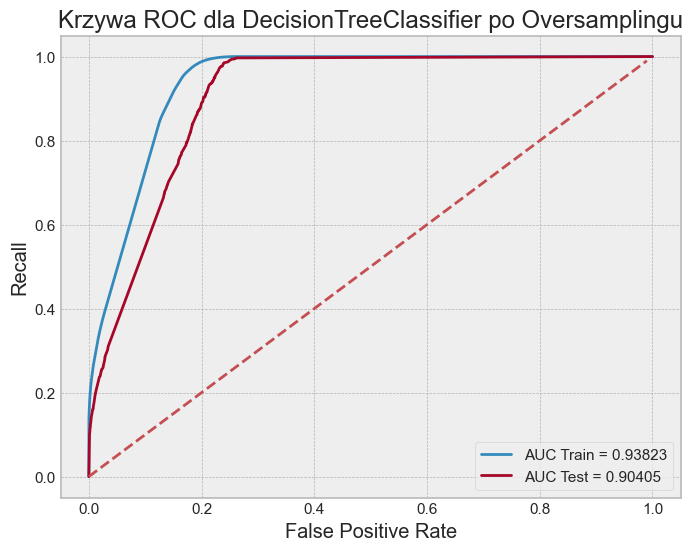

In [105]:
plt.style.use('bmh')
plt.plot(fpr3, tpr3, label="AUC Train = " + str(s1))
plt.plot(fpr4, tpr4, label="AUC Test = " + str(s2))
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'r--')
plt.title('Krzywa ROC dla DecisionTreeClassifier po Oversamplingu')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [107]:
pred_test2 = model_smote2.predict(test_X)


In [109]:
print(classification_report(test_y, pred_test2))
print('Accuracy Score: ', accuracy_score(test_y, pred_test2))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y, pred_test2))
print('Confusion Matrix: \n', confusion_matrix(test_y, pred_test2))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     20499
           1       0.33      0.87      0.47      2210

    accuracy                           0.81     22709
   macro avg       0.65      0.84      0.68     22709
weighted avg       0.92      0.81      0.85     22709

Accuracy Score:  0.8112642564621956
Balanced_accuracy Score:  0.839343206014464
Confusion Matrix: 
 [[16491  4008]
 [  278  1932]]


Text(0.5, 1.0, 'Macierz pomyłek')

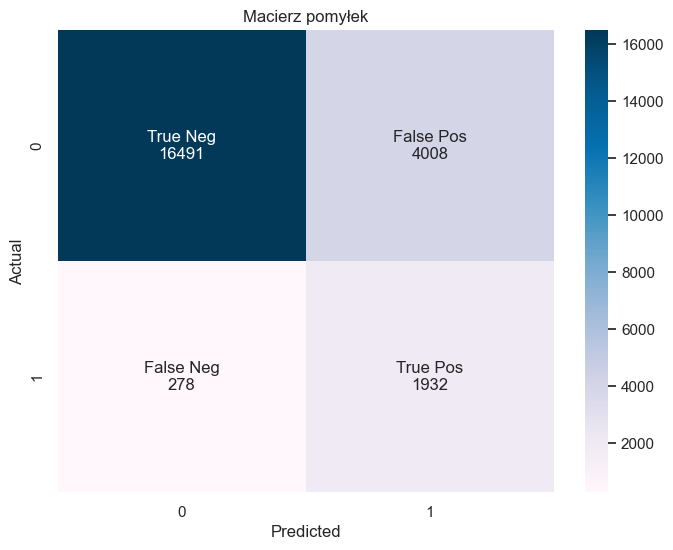

In [110]:
cf_matrix2 = confusion_matrix(y_true=test_y, y_pred=pred_test2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix2.flatten()] #flatten() 'splaszcza' matryce

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='PuBu')
ax.set(xlabel='Predicted', ylabel='Actual');
plt.title ("Macierz pomyłek")

<Axes: title={'center': 'Istotność cech - SMOTE'}>

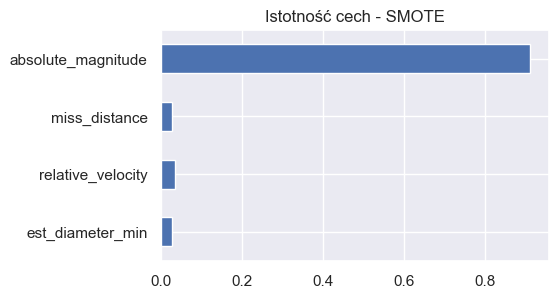

In [111]:
feat_importances = pd.Series(model_smote2.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh', title='Istotność cech - SMOTE',figsize=[5,3])

Podstawowy model

In [112]:
print(classification_report(test_y, pred_test))
print('Accuracy Score: ', accuracy_score(test_y, pred_test))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y, pred_test))
print('Confusion Matrix: \n', confusion_matrix(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20499
           1       0.84      0.12      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.88      0.56      0.58     22709
weighted avg       0.91      0.91      0.88     22709

Accuracy Score:  0.9123695451142719
Balanced_accuracy Score:  0.5604719598947439
Confusion Matrix: 
 [[20446    53]
 [ 1937   273]]


In [62]:
dt= DecisionTreeClassifier(max_depth=7, random_state=123,criterion = 'entropy' )
dt.fit(X,y)
pred_test = dt.predict(X)

### Rozkład cech

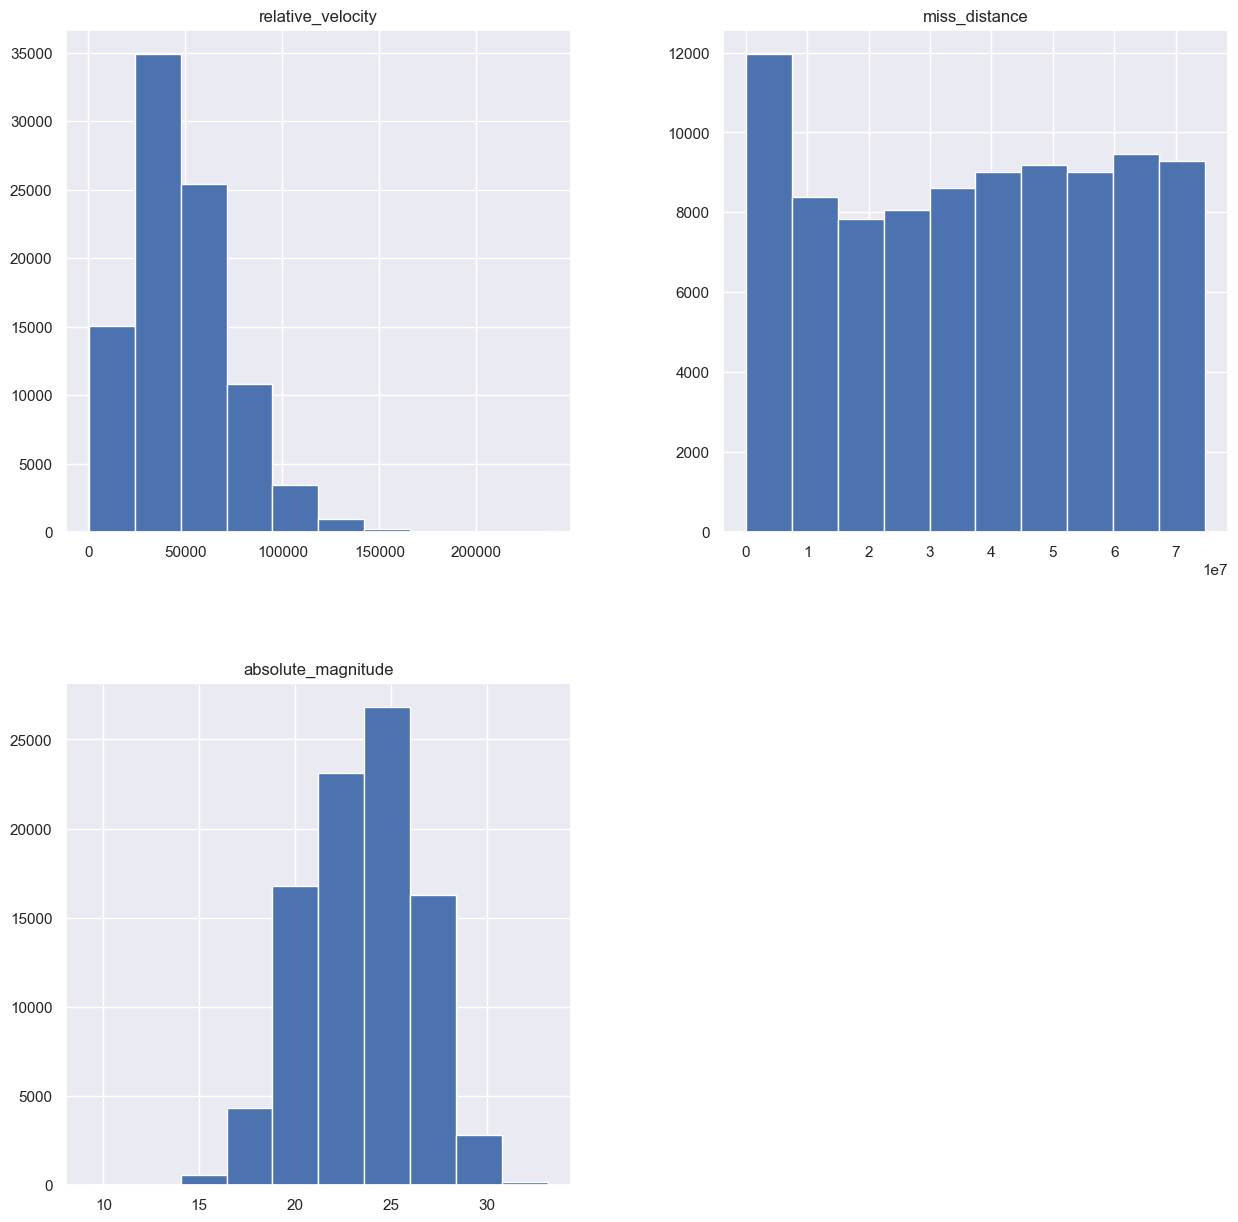

In [113]:
variables = []

for var in df.columns:
    
    if var not in ["id","name"] and df[var].dtypes != "O":
        if np.sum(np.where(df[var] <= 0, 1, 0)) == 0:
            variables.append(var)
 
# Explore the distribution of selected variables

df[variables].hist(figsize=(15,15))
plt.show() 

In [67]:
import seaborn as sns
import scipy.stats as stats

sns.set_theme()

def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

In [68]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

/Users/ML/opt/anaconda3/envs/envpy38/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


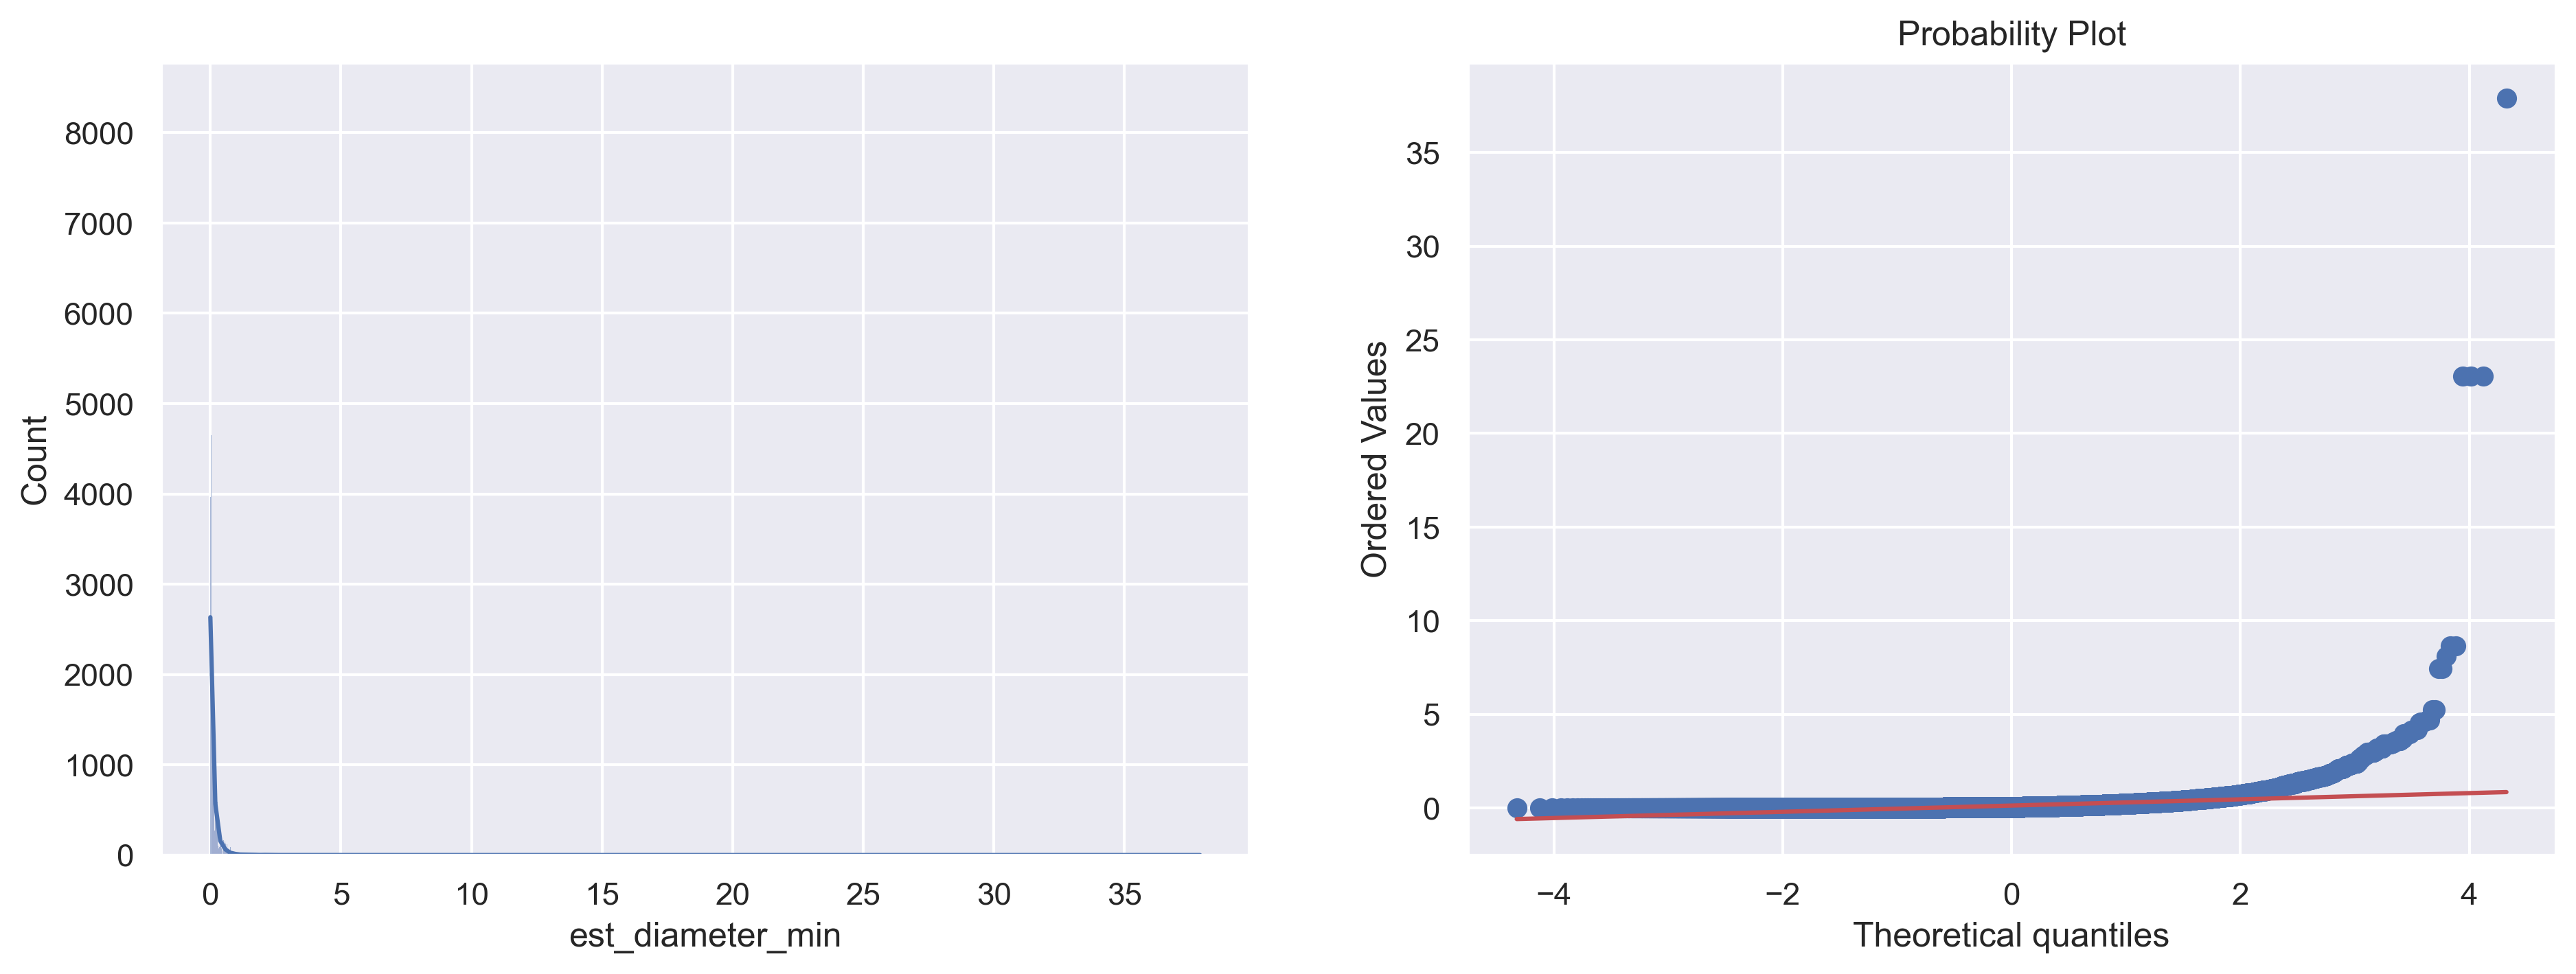

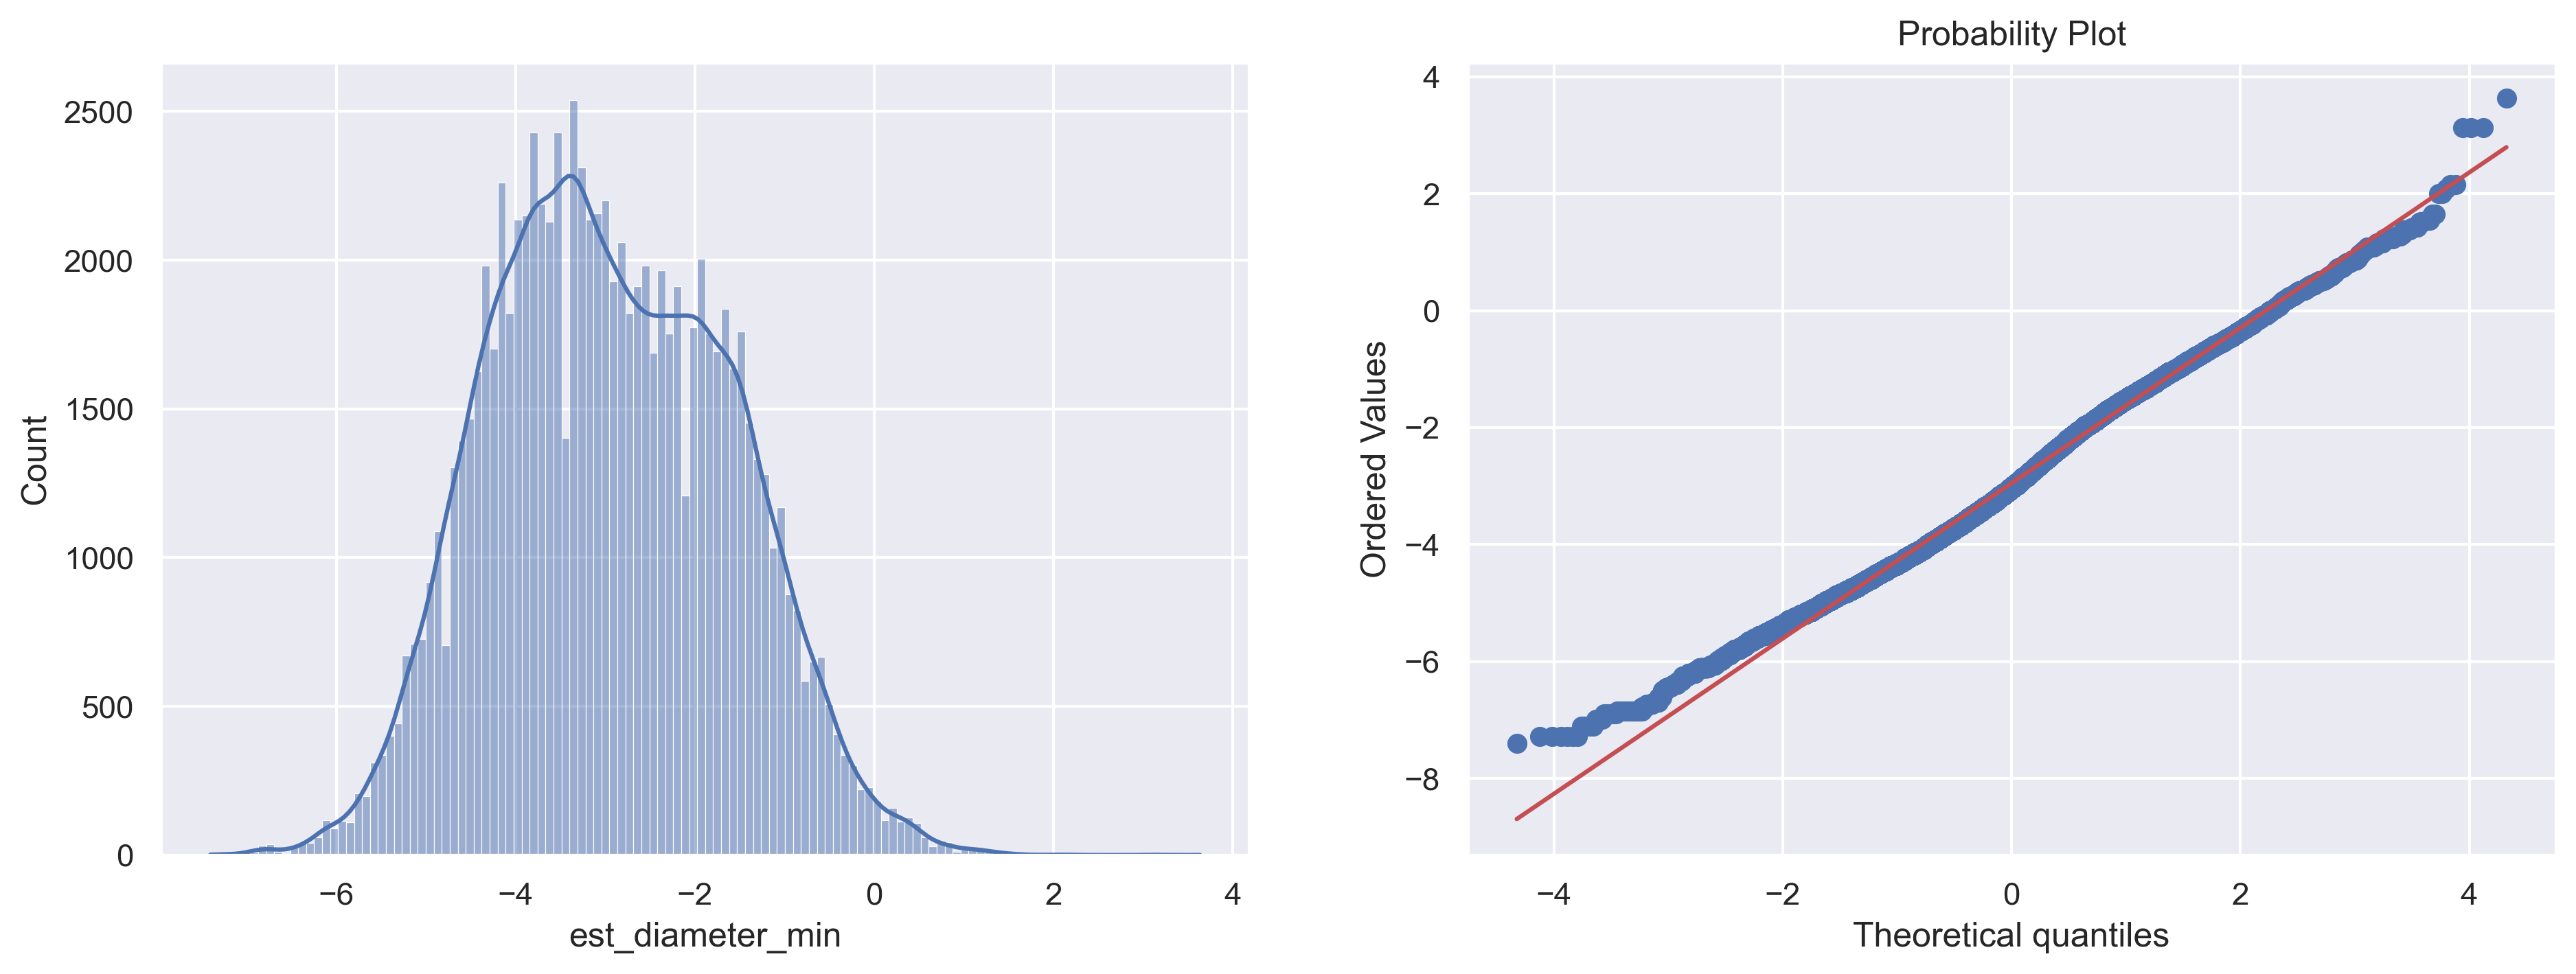

In [69]:
transformer = FunctionTransformer(np.log, validate=True)
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "est_diameter_min" )
Gaussian_distribution_check(transformed_var, "est_diameter_min")

In [70]:
transformed_var

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
0,0.180880,9.515561,17.819926,2.817204
1,-1.325011,11.206247,17.933541,2.995732
2,-0.325689,11.646220,17.723500,2.880882
3,-2.338149,10.117159,17.051636,3.100092
4,-1.366458,10.662838,17.650125,3.000222
...,...,...,...,...
90831,-3.627596,10.860515,16.325141,3.218876
90832,-4.088113,10.738885,17.810425,3.258097
90833,-3.443389,8.931527,17.161927,3.202746
90834,-4.917044,11.144744,18.045144,3.325036


In [114]:
df['est_diameter_min']= transformed_var['est_diameter_min']
df

,id,name,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),0.180880,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),-1.325011,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),-0.325689,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),-2.338149,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),-1.366458,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),-3.627596,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),-4.088113,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),-3.443389,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),-4.917044,69199.154484,6.869206e+07,27.80,False


In [115]:
t= df['hazardous']
t

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [118]:
features1 = ['est_diameter_min',
       'relative_velocity', 'miss_distance',
       'absolute_magnitude']

X1 = df[features1]
X1

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
0,0.180880,13569.249224,5.483974e+07,16.73
1,-1.325011,73588.726663,6.143813e+07,20.00
2,-0.325689,114258.692129,4.979872e+07,17.83
3,-2.338149,24764.303138,2.543497e+07,22.20
4,-1.366458,42737.733765,4.627557e+07,20.09
...,...,...,...,...
90831,-3.627596,52078.886692,1.230039e+07,25.00
90832,-4.088113,46114.605073,5.432121e+07,26.00
90833,-3.443389,7566.807732,2.840077e+07,24.60
90834,-4.917044,69199.154484,6.869206e+07,27.80


In [119]:
y =df['hazardous']
y

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [120]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y, test_size=0.25, random_state=123, stratify=y)

In [121]:
train_X1

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
28286,-4.907834,23439.150764,3.468434e+07,27.78
24634,-0.846073,67602.929208,3.824400e+07,18.96
55816,-4.594682,20098.457323,4.226796e+07,27.10
15074,-3.121028,17019.249769,2.833294e+07,23.90
49915,-2.660510,112890.203142,6.800390e+07,22.90
...,...,...,...,...
12699,-3.121028,15523.858892,1.598406e+07,23.90
26390,-3.438784,50992.863708,5.800555e+07,24.59
34259,-4.042062,25098.870902,4.274837e+06,25.90
76123,-0.606605,64385.608475,1.446766e+07,18.44


In [129]:
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(train_X1))
X_test_scaled=pd.DataFrame(sc.transform(test_X1))

In [130]:
dt1= DecisionTreeClassifier(max_depth=7, random_state=123,criterion = 'entropy' )
dt1.fit(X_train_scaled, train_y1)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

In [132]:
pred1_train = dt1.predict(X_train_scaled)
pred1_test = dt1.predict(X_test_scaled)

In [134]:
print(classification_report(train_y,pred1_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61497
           1       0.87      0.13      0.22      6630

    accuracy                           0.91     68127
   macro avg       0.89      0.56      0.59     68127
weighted avg       0.91      0.91      0.88     68127



In [125]:
print(classification_report(test_y1,pred1_test))
print ( )
print('Confusion Matrix: \n', confusion_matrix(test_y1, pred1_test))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     20499
        True       0.84      0.12      0.22      2210

    accuracy                           0.91     22709
   macro avg       0.88      0.56      0.58     22709
weighted avg       0.91      0.91      0.88     22709


Confusion Matrix: 
 [[20446    53]
 [ 1937   273]]


In [126]:
train_X1

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
28286,-4.907834,23439.150764,3.468434e+07,27.78
24634,-0.846073,67602.929208,3.824400e+07,18.96
55816,-4.594682,20098.457323,4.226796e+07,27.10
15074,-3.121028,17019.249769,2.833294e+07,23.90
49915,-2.660510,112890.203142,6.800390e+07,22.90
...,...,...,...,...
12699,-3.121028,15523.858892,1.598406e+07,23.90
26390,-3.438784,50992.863708,5.800555e+07,24.59
34259,-4.042062,25098.870902,4.274837e+06,25.90
76123,-0.606605,64385.608475,1.446766e+07,18.44


In [39]:
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5)
param_grid= [                           
              {
                'max_depth': range(1, 60, 2),
                'min_samples_leaf' : range(2, 50),
                'criterion' : ["gini", "entropy"],
                'random_state':[123]
                }
              ]

print(param_grid)

model_recall = DecisionTreeClassifier()
  
grid_smote = GridSearchCV(estimator=model_recall
                                 , param_grid=param_grid, scoring= "roc_auc")
 
grid_smote.fit(train_X, y=train_y)
 
best_parameters_smote = grid_smote.best_params_  
print(best_parameters_smote) 

[{'max_depth': range(1, 60, 2), 'min_samples_leaf': range(2, 50), 'criterion': ['gini', 'entropy'], 'random_state': [123]}]


KeyboardInterrupt: 

### Regresja logistyczna

In [138]:
from sklearn.linear_model import LogisticRegression
modell= LogisticRegression(random_state = 123)
modell.fit(X_train_scaled, train_y)

LogisticRegression(random_state=123)

In [139]:
pred1_train = modell.predict(X_train_scaled)
pred1_test = modell.predict(X_test_scaled)

In [140]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, pred1_test)
cnf_matrix

array([[20100,   399],
       [ 2061,   149]])

In [141]:
y_pred_lr = modell.predict(X_train_scaled)
y_pred_lr1 = modell.predict(X_test_scaled)
print(classification_report(train_y, y_pred_lr))
print('Accuracy Score: ', accuracy_score(train_y, y_pred_lr))
print('Balanced_accuracy Score: ', balanced_accuracy_score(train_y, y_pred_lr))
print('Confusion Matrix: \n', confusion_matrix(train_y, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     61497
           1       0.31      0.08      0.13      6630

    accuracy                           0.89     68127
   macro avg       0.61      0.53      0.53     68127
weighted avg       0.85      0.89      0.86     68127

Accuracy Score:  0.8931260733629839
Balanced_accuracy Score:  0.5302331710695963
Confusion Matrix: 
 [[60318  1179]
 [ 6102   528]]


In [143]:
print(classification_report(test_y, y_pred_lr1))
print('Accuracy Score: ', accuracy_score(test_y, y_pred_lr1))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y, y_pred_lr1))
print('Confusion Matrix: \n', confusion_matrix(test_y, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     20499
           1       0.27      0.07      0.11      2210

    accuracy                           0.89     22709
   macro avg       0.59      0.52      0.53     22709
weighted avg       0.85      0.89      0.86     22709

Accuracy Score:  0.8916729050156326
Balanced_accuracy Score:  0.5239782251821576
Confusion Matrix: 
 [[20100   399]
 [ 2061   149]]
